### Project goal: use unsupervised learning to identify the dominate colors in satellite images

Map data source:  https://www.africageoportal.com/pages/africa-living-atlas
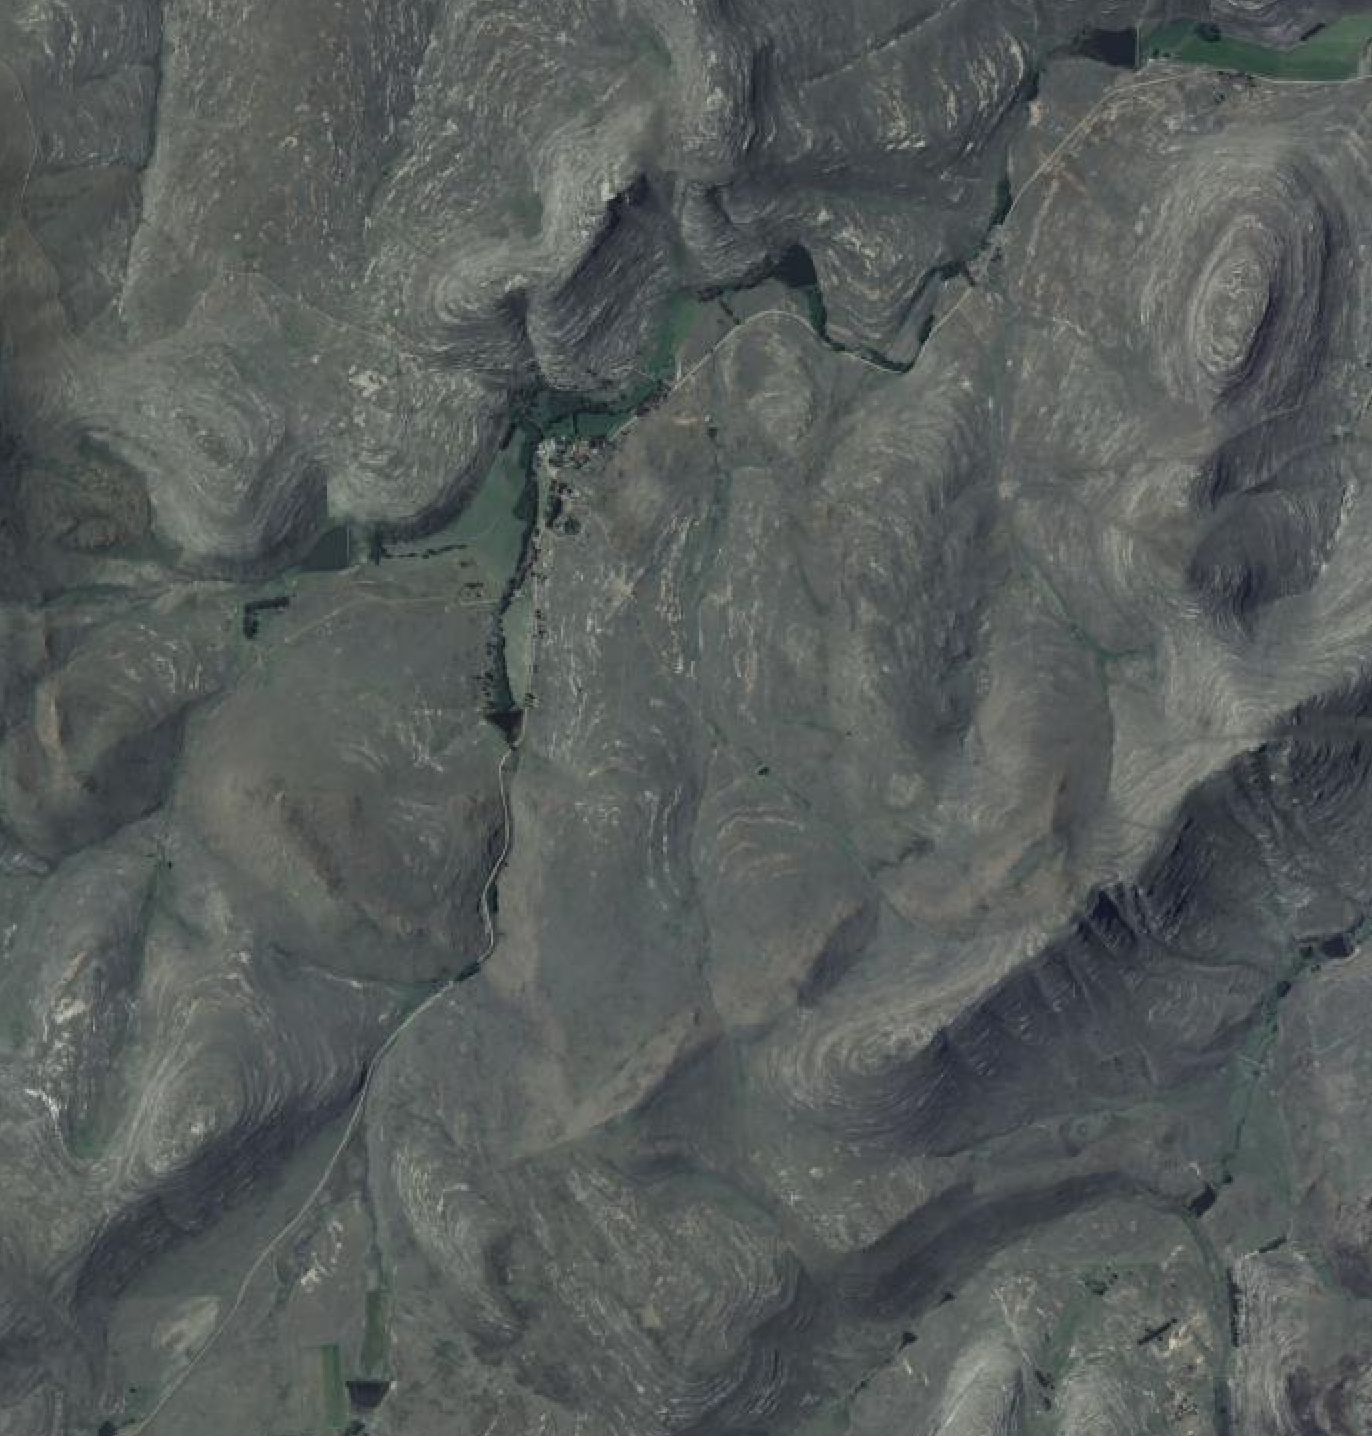

In [52]:
import os
import matplotlib.image as img
dat_path = os.getcwd() + os.sep + 'dea/'
 
sat_image = img.imread(dat_path + 'dea_1.jpg')
print(sat_image.shape)

# store image in r, g, b color rows
r = []
g = []
b = []

for rows in sat_image:
    for dum_r, dum_g, dum_b in rows:
        r.append(dum_r)
        g.append(dum_g)
        b.append(dum_b)

(1436, 1372, 3)


In [53]:
# normalise image values
import pandas as pd
from scipy.cluster.vq import whiten

df_sat = pd.DataFrame({'red': r,
                        'green': g,
                        'blue': b})

df_sat[['scaled_r', 'scaled_g', 'scaled_b']] = df_sat[['red', 'green', 'blue']].apply(lambda x: whiten(x))
print(df_sat.head())

1841026    211
1841025    208
1510622    207
1842398    207
1842397    206
Name: red, dtype: int64
   red  green  blue  scaled_r  scaled_g  scaled_b
0   88     93    89  4.772885  5.242282  5.839478
1   89     94    90  4.827122  5.298651  5.905091
2   90     95    91  4.881360  5.355019  5.970703
3   89     94    90  4.827122  5.298651  5.905091
4   87     92    88  4.718648  5.185914  5.773866


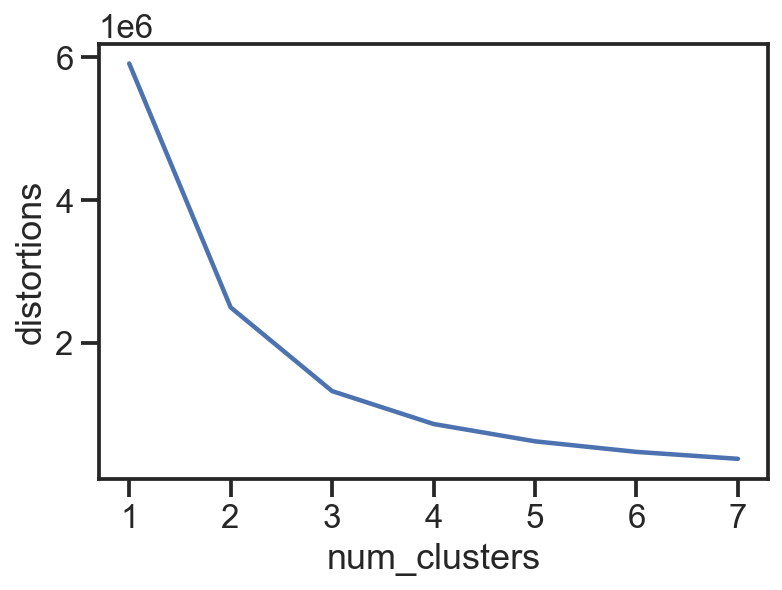

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from sklearn.cluster import KMeans

# Make images less blurry on Jupyter.
%config InlineBackend.figure_format = 'retina'
sns.set()
sns.set_style('ticks')
sns.set_context('talk')

distortions = []
num_clusters = range(1, 8)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, tol=1e-04, random_state=20)
    km.fit(df_sat[['scaled_r', 'scaled_g','scaled_b']])               
    distortions.append(km.inertia_)

# Create a data frame for num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

The elbow method shows that 3 clusters are good enough.

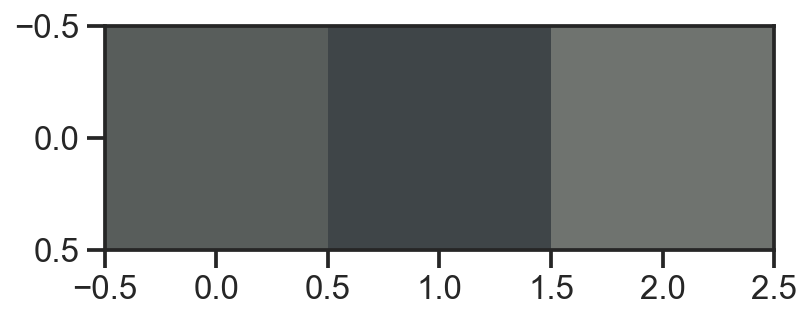

In [56]:
nc = 3
km = KMeans(n_clusters=nc, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=100)
km.fit(df_sat[['scaled_r', 'scaled_g','scaled_b']])               

cluster_centers = km.cluster_centers_

colors = []

# Get standard deviations of each color
r_std, g_std, b_std = df_sat[['red', 'green', 'blue']].std()

for cc in cluster_centers:
    scaled_r, scaled_g, scaled_b = cc
    # Convert each standardized value to scaled value
    colors.append((
                 scaled_r * r_std / 255,
                 scaled_g * g_std / 255,
                 scaled_b * b_std / 255
                 ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

Top 3 dominate colors of the satellite image.